<a href="https://colab.research.google.com/github/alvinsenjaya/TomatoPlantDiseases/blob/master/Base_NASNetMobile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Required Libraries**

In [0]:
import os
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# **Download Dataset**

In [0]:
os.environ['KAGGLE_USERNAME']="xxxxx"
os.environ['KAGGLE_KEY']="xxxxxxxxxxxxxxxxxxxxxx"

In [0]:
!kaggle datasets download noulam/tomato

 99% 738M/743M [00:21<00:00, 60.8MB/s]
100% 743M/743M [00:21<00:00, 35.5MB/s]


In [0]:
!unzip tomato.zip

# **Image Preprocessing**

In [2]:
TRAINING_DIR = '/content/New Plant Diseases Dataset(Augmented)/train/'
training_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=90,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

VALIDATION_DIR = '/content/New Plant Diseases Dataset(Augmented)/valid/'
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(224,224),
    class_mode='categorical',
    batch_size=128
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(224,224),
    class_mode='categorical',
    batch_size=128
)

Found 18345 images belonging to 10 classes.
Found 4585 images belonging to 10 classes.


# **Define Machine Learning Model**

In [3]:
base_model = tf.keras.applications.NASNetMobile(weights='imagenet', include_top=False, input_shape=(224,224,3))

print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  769


In [4]:
for i, layer in enumerate(base_model.layers):
  print(i, layer.name)

0 input_1
1 stem_conv1
2 stem_bn1
3 activation
4 reduction_conv_1_stem_1
5 reduction_bn_1_stem_1
6 activation_1
7 activation_3
8 separable_conv_1_pad_reduction_left1_stem_1
9 separable_conv_1_pad_reduction_right1_stem_1
10 separable_conv_1_reduction_left1_stem_1
11 separable_conv_1_reduction_right1_stem_1
12 separable_conv_1_bn_reduction_left1_stem_1
13 separable_conv_1_bn_reduction_right1_stem_1
14 activation_2
15 activation_4
16 separable_conv_2_reduction_left1_stem_1
17 separable_conv_2_reduction_right1_stem_1
18 activation_5
19 separable_conv_2_bn_reduction_left1_stem_1
20 separable_conv_2_bn_reduction_right1_stem_1
21 separable_conv_1_pad_reduction_right2_stem_1
22 activation_7
23 reduction_add_1_stem_1
24 separable_conv_1_reduction_right2_stem_1
25 separable_conv_1_pad_reduction_right3_stem_1
26 activation_9
27 separable_conv_1_bn_reduction_right2_stem_1
28 separable_conv_1_reduction_right3_stem_1
29 separable_conv_1_reduction_left4_stem_1
30 activation_6
31 separable_conv_1_bn_r

In [0]:
base_model.trainable = True

fine_tune_at = 591
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

In [6]:
model = tf.keras.models.Sequential([
  base_model,
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
NASNet (Model)               (None, 7, 7, 1056)        4269716   
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 1056)        0         
_________________________________________________________________
flatten (Flatten)            (None, 51744)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               26493440  
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 30,768,286
Trainable params: 29,040,010
Non-trainable params: 1,728,276
_________________________________________________________________


# **Define Learning Parameter**

In [0]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# **Begin Training**

In [8]:
history = model.fit(train_generator, epochs=20, validation_data=validation_generator)

Epoch 1/20
144/144 [==============================] - 230s 2s/step - loss: 1.6706 - accuracy: 0.6208 - val_loss: 50.5959 - val_accuracy: 0.1119
Epoch 2/20
144/144 [==============================] - 228s 2s/step - loss: 0.3020 - accuracy: 0.9022 - val_loss: 13.3244 - val_accuracy: 0.1597
Epoch 3/20
144/144 [==============================] - 230s 2s/step - loss: 0.2057 - accuracy: 0.9332 - val_loss: 6.2259 - val_accuracy: 0.2923
Epoch 4/20
144/144 [==============================] - 233s 2s/step - loss: 0.1647 - accuracy: 0.9466 - val_loss: 6.1387 - val_accuracy: 0.2949
Epoch 5/20
144/144 [==============================] - 230s 2s/step - loss: 0.1398 - accuracy: 0.9533 - val_loss: 2.3188 - val_accuracy: 0.4846
Epoch 6/20
144/144 [==============================] - 239s 2s/step - loss: 0.1248 - accuracy: 0.9577 - val_loss: 3.1800 - val_accuracy: 0.3653
Epoch 7/20
144/144 [==============================] - 234s 2s/step - loss: 0.1108 - accuracy: 0.9630 - val_loss: 3.7976 - val_accuracy: 0.40

# **Plot Training Results**

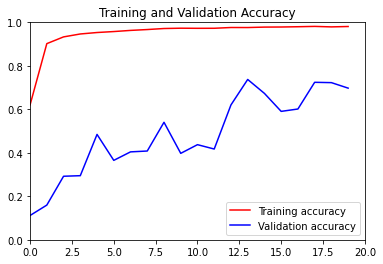

<Figure size 432x288 with 0 Axes>

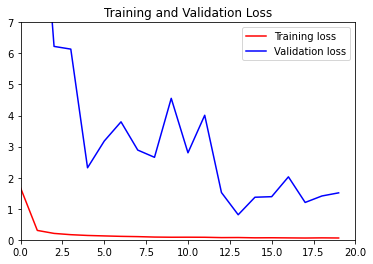

<Figure size 432x288 with 0 Axes>

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.ylim(0, 1)
plt.xlim(0, 20)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.ylim(0, 7)
plt.xlim(0, 20)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend(loc=0)
plt.figure()
plt.show()

# **Save Model**

In [0]:
export_path = "/content/saved_model"

try: 
  os.mkdir(export_path) 
except OSError as error: 
  print(error) 

tf.keras.models.save_model(
    model,
    export_path,
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None
)

print('\nSaved model:')
!ls -l {export_path}

# **Download Saved Model**

In [0]:
!zip -r /content/nasnetmobile.zip /content/saved_model

In [0]:
files.download("/content/nasnetmobile.zip")

# **Save to Google Drive**

In [0]:
from google.colab import drive
drive.mount('/content/gdrive/')

In [0]:
!cp nasnetmobile.zip '/content/gdrive/My Drive/Saved Model/'

# **Upload Saved Model**

In [0]:
uploaded = files.upload()
!unzip /content/nasnetmobile.zip
model = tf.keras.models.load_model('/content/saved_model/')
model.summary()

# **Upload Saved Model From Google Drive**

In [0]:
from google.colab import drive
drive.mount('/content/gdrive/')

In [0]:
!cp '/content/gdrive/My Drive/Saved Model/nasnetmobile.zip' /content/
!unzip /content/nasnetmobile.zip
model = tf.keras.models.load_model('/content/saved_model/')
model.summary()

# **Try Classification**

In [0]:
from google.colab import files

file = files.upload()

img = image.load_img(list(file.keys())[0], target_size=(224, 224))
img = image.img_to_array(img)
img = img.reshape(1, 224, 224, 3)
img = img.astype('float32')
img = img / 255.0
result = model.predict(img)
result = list(result[0]).index(max(result[0]))

print("\n\nResult :")

if result == 0:
  print("Bacterial Spot")
elif result == 1:
  print("Early Blight")
elif result == 2:
  print("Late Blight")
elif result == 3:
  print("Leaf Mold")
elif result == 4:
  print("Septoria Leaf Spot")
elif result == 5:
  print("Spider Mites")
elif result == 6:
  print("Target Spot")
elif result == 7:
  print("Yellow Leaf Curl Virus")
elif result == 8:
  print("Mosaic Virus")
else:
  print("Healthy")